In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten,UpSampling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
seed = 7
np.random.seed(seed)
(X_train, _), (X_test, _) = mnist.load_data()


Using TensorFlow backend.
c:\users\danny\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\danny\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\danny\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [2]:
a = Input(shape=(32,))
b = Dense(32, activation="relu")(a)
model = Model(inputs=a, outputs=b)

In [3]:

inputs = Input(shape=(8,))
hidden1 = Dense(10, activation="relu")(inputs)
hidden2 = Dense(8, activation="relu")(hidden1)
outputs = Dense(1, activation="sigmoid")(hidden2)
model = Model(inputs=inputs, outputs=outputs)

In [4]:
X_train = X_train.reshape(X_train.shape[0],28*28).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28*28).astype("float32")
X_train = X_train / 255
X_test = X_test / 255
input_img = Input(shape=(784,))
x = Dense(128, activation="relu")(input_img)
encoded = Dense(64, activation="relu")(x)
x = Dense(128, activation="relu")(encoded)
decoded = Dense(784, activation="sigmoid")(x)
autoencoder = Model(input_img, decoded)

In [5]:
encoder = Model(input_img, encoded)
decoder_input = Input(shape=(64,))
decoder_layer = autoencoder.layers[-2](decoder_input)
decoder_layer = autoencoder.layers[-1](decoder_layer)
decoder = Model(decoder_input, decoder_layer)
autoencoder.compile(loss="binary_crossentropy",
optimizer="adam", metrics=["accuracy"])
history=autoencoder.fit(X_train, X_train, validation_data=(X_test,
X_test), epochs=10, batch_size=256, shuffle=True,
verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 0.2233 - accuracy: 0.7897 - val_loss: 0.1406 - val_accuracy: 0.8062
Epoch 2/10
 - 2s - loss: 0.1251 - accuracy: 0.8101 - val_loss: 0.1119 - val_accuracy: 0.8111
Epoch 3/10
 - 2s - loss: 0.1080 - accuracy: 0.8125 - val_loss: 0.1017 - val_accuracy: 0.8123
Epoch 4/10
 - 2s - loss: 0.0998 - accuracy: 0.8135 - val_loss: 0.0955 - val_accuracy: 0.8128
Epoch 5/10
 - 2s - loss: 0.0944 - accuracy: 0.8140 - val_loss: 0.0912 - val_accuracy: 0.8134
Epoch 6/10
 - 2s - loss: 0.0906 - accuracy: 0.8143 - val_loss: 0.0880 - val_accuracy: 0.8136
Epoch 7/10
 - 2s - loss: 0.0882 - accuracy: 0.8145 - val_loss: 0.0862 - val_accuracy: 0.8137
Epoch 8/10
 - 2s - loss: 0.0864 - accuracy: 0.8146 - val_loss: 0.0847 - val_accuracy: 0.8137
Epoch 9/10
 - 2s - loss: 0.0851 - accuracy: 0.8147 - val_loss: 0.0835 - val_accuracy: 0.8138
Epoch 10/10
 - 2s 

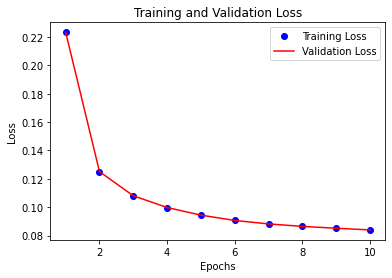

In [6]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

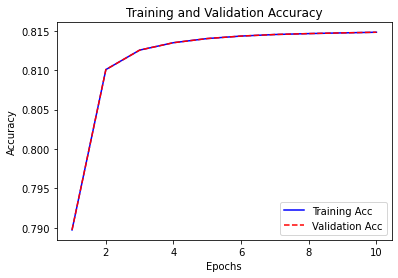

In [7]:
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [34]:
(X_train, _), (X_test, _) = mnist.load_data()

In [9]:
input_img = Input(shape=(28,28,1))
x = Conv2D(16, (3,3), activation="relu", padding="same")(input_img)
x = MaxPooling2D((2,2), padding="same")(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(x)
x = MaxPooling2D((2,2), padding="same")(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(x)
encoded = MaxPooling2D((2,2), padding="same")(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3), activation="relu", padding="same")(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation="relu")(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x) 
autoencoder = Model(input_img,decoded)

NameError: name 'y_train' is not defined

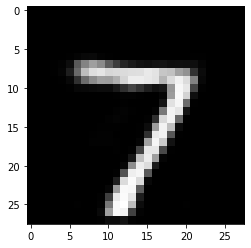

In [33]:
import matplotlib.pyplot as plt

plt.imshow(decoded_imgs[0].reshape(28,28), cmap="gray")
plt.axis("off")
plt.show()

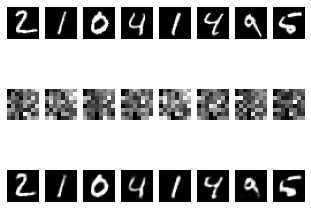

In [69]:
for i in range(1,9):
    ax = plt.subplot(3,9,i)
    ax.imshow(X_test[i], cmap="gray")
    ax.axis("off")
    ax = plt.subplot(3,9,i+9)
    ax.imshow(encoded_imgs[i].reshape(8,8), cmap="gray")
    ax.axis("off")
    ax = plt.subplot(3,9,i+18)
    ax.imshow(decoded_imgs[i].reshape(28,28), cmap="gray")
    ax.axis("off")
plt.subplots_adjust(hspace = .5)
plt.show()